For the ICC 2023, the below routine will calculate the minimum distance hamiltonian cycle so the matches can be scheduled with minimum travel time and minimizing expenses on travel/fatigue while maximizing players comfort and relax.

When represented as a graph, the distances between two cities is given by the weights of edges connecting those  cities, This TSP is first expressed in term of a complete Graph. 
The nine cities that have been chosen for team India matches are - Ahmedabad, Bengaluru, Chennai, Delhi, Dharamshala, Kolkata, Lucknow, Mumbai and Pune so we can assign each city a number respectively as 0, 1, 2, 3, 4, 5, 6, 7, 8
and the distances between each pair of cities is the weight on the edge that connects two cities/nodes.

Such a network can be best elaborated with a complete graph of nine nodes, here in this graph we have a total of n chose 2 = 36 edges, here we have taken these 36 aerial distance in kilometers  
D01 = 1235, D02 = 1371, D03 = 775, D04 = 1087, D05 = 1617, D06 = 942, D07 = 441, D08 = 518, 
D12 = 284,  D13 = 1740, D14 = 2144, D15 = 1560, D16 = 1578, D17 = 842, D18 = 734,
D23 = 1760, D24 = 2169, D25 = 1366, D26 = 1534, D27 = 1028, D28 = 912, 
D34 = 409, D35 = 1305, D36 = 419, D37 = 1148, D38 = 1173, 
D45 = 1599, D46 = 748, D47 = 1501, D48 = 1543,
D56 = 886, D57 = 1652, D58 = 1575,
D67 = 1190, D68 = 1173,
D78 = 118

Using these problem information we can first build a graph with help of networkx, that will gives us a nice visualization and groudwork on our optimization problem. 


The number of combinations of relevant edges for a 9 cities graph in this team_INDIA_tour_tsp problem is =  36


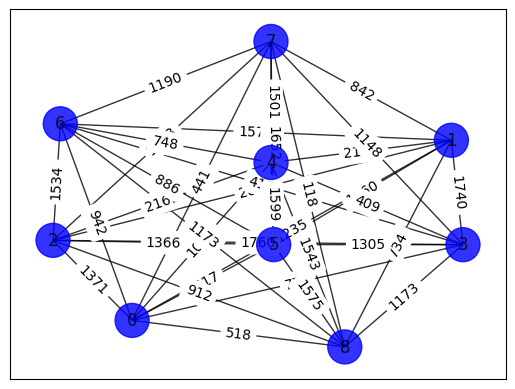

In [2]:
#TSP correspondence with the Graph theory  
from itertools import combinations
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

num_Tm_Ind_cities = 9

def graph_plot(G, colors, layout):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=layout)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_labels)

# break down the problem to fit on Quantum hardware 
cci_2023_TeamINDIA_Tsp_graph = nx.Graph()
cci_2023_TeamINDIA_Tsp_graph.add_nodes_from(np.arange(0, num_Tm_Ind_cities, 1))
print('The number of combinations of relevant edges for a', num_Tm_Ind_cities,'cities graph in this team_INDIA_tour_tsp problem is = ', len(list(combinations(range(0, num_Tm_Ind_cities),2))))

Tm_Ind_cities = [(0, 1, 1235), (0, 2, 1371), (0, 3, 775), (0, 4, 1087), (0, 5, 1617), (0, 6, 942), (0, 7, 441), (0, 8, 518), 
                (1, 2, 284),  (1, 3, 1740), (1, 4, 2144), (1, 5, 1560), (1, 6, 1578), (1, 7, 842), (1, 8, 734),
                (2, 3, 1760),  (2, 4, 2169), (2, 5, 1366), (2, 6, 1534), (2, 7, 1028), (2, 8, 912), 
                (3, 4, 409),  (3, 5, 1305), (3, 6, 419), (3, 7, 1148), (3, 8, 1173), 
                (4, 5, 1599),  (4, 6, 748), (4, 7, 1501), (4, 8, 1543),
                (5, 6, 886), (5, 7, 1652), (5, 8, 1575), 
                (6, 7, 1190), (6, 8, 1173), 
                (7, 8, 118)]

cci_2023_TeamINDIA_Tsp_graph.add_weighted_edges_from(Tm_Ind_cities)
colors = ["b" for node in cci_2023_TeamINDIA_Tsp_graph.nodes()]
layout = nx.spring_layout(cci_2023_TeamINDIA_Tsp_graph)

graph_plot(cci_2023_TeamINDIA_Tsp_graph, colors, layout)

In [3]:
# lets build the adjecency matrix to get a better view of weigths (distances) between the nodes.   
ent_temp = 0
adjacency_matrix = np.zeros([num_Tm_Ind_cities, num_Tm_Ind_cities])
for i in range(num_Tm_Ind_cities):
    for j in range(num_Tm_Ind_cities):
        ent_temp = cci_2023_TeamINDIA_Tsp_graph.get_edge_data(i, j, default=0)
        if ent_temp != 0:
            adjacency_matrix[i, j] = ent_temp["weight"]
print(" adjacency matrix for our symmetric tsp problem is given by \n", adjacency_matrix)


 adjacency matrix for our symmetric tsp problem is given by 
 [[   0. 1235. 1371.  775. 1087. 1617.  942.  441.  518.]
 [1235.    0.  284. 1740. 2144. 1560. 1578.  842.  734.]
 [1371.  284.    0. 1760. 2169. 1366. 1534. 1028.  912.]
 [ 775. 1740. 1760.    0.  409. 1305.  419. 1148. 1173.]
 [1087. 2144. 2169.  409.    0. 1599.  748. 1501. 1543.]
 [1617. 1560. 1366. 1305. 1599.    0.  886. 1652. 1575.]
 [ 942. 1578. 1534.  419.  748.  886.    0. 1190. 1173.]
 [ 441.  842. 1028. 1148. 1501. 1652. 1190.    0.  118.]
 [ 518.  734.  912. 1173. 1543. 1575. 1173.  118.    0.]]


$Solving$ $a$ $TSP$

One of straight forward method to find the best hamiltonian path is to use an $Exhaustive$ search, Exhaustive search is the most common gradient free method for finding optimal hamiltonian path and it works just fine for small number of nodes in a network. below we have coded a simple exhaustive bruteforce method to find the shortest cycle, this search can not be used for large number of nodes as the permutations of path will grow exponantially with linear increase in number of nodes in a network. given $n$ as the number of nodes, the complexity of bruteforce algorithm is $O(n!)$ and with dynamic programming we can get $O(n^2 * 2^n)$ , so it remains exponantial.

In [4]:
import math
from itertools import permutations
num_of_path_permutations = math.factorial(num_Tm_Ind_cities-1) / 2
print('The number of distinct paths for', num_Tm_Ind_cities, 'nodes is obtained using the permutation formula ', num_of_path_permutations)
#b = list(combinations(range(0, no_of_cities),2))

no_of_permutations = len(list(permutations(range(1, num_Tm_Ind_cities))))
def tsp_exhaustive_bf(Adj_m, num_of_cities):
    perm_list = list(permutations(range(1, num_of_cities)))
    #print(perm_list)
    total_best_distance = 10000000  # set to one crore kilometers
    for path in perm_list:          # go over all the possible paths
        total_distance = 0
        pre_city = 0
        for city_index in path:     # go over each node in a path to calculate the distance 
            total_distance = total_distance + Adj_m[city_index, pre_city]
            pre_city = city_index
        total_distance = total_distance + Adj_m[pre_city, 0]
        cycle = (0,) + path
#        print('path in checking', cycle, 'distance' , total_distance)
        if total_distance < total_best_distance:
            hamilonian_cycle = cycle
            total_best_distance = total_distance
            #print("order = " + str(order) + " Distance = " + str(total_distance))
    return total_best_distance, hamilonian_cycle

total_best_distance, most_efficient_route = tsp_exhaustive_bf(adjacency_matrix, num_Tm_Ind_cities)
print("The Hamiltonian cycle = " + str(most_efficient_route) + " with total distance = "+ str(total_best_distance))
## add code to decod present city order and print 


The number of distinct paths for 9 nodes is obtained using the permutation formula  20160.0
The Hamiltonian cycle = (0, 4, 3, 6, 5, 2, 1, 8, 7) with total distance = 5744.0


Once we have build the adjcency matrix associated with the problem can use Tsp optimization class directly form the Qiskit optimization applications library, this will help us obtain the binary quadratic objective function along with the applicable constraints. In order get an instance of TSP object, we have to provide the adjacency matrix as an input to TSP class.  As we have noted earlier, for representing each node and its associated order in the hamilton cycle we need a total of 9^2 = 81 binary variables and 10 linear constraints, we can check the output to and validate decision variables, quadratic objective funtions and constraints if everything is in order.

We will then use Qiskit application modules to convert our tsp optimization problem into a quadratic program then to a QUBO so we can then convert same to an equivalent Ising energy hamiltonian and finally use variational quantum algorithms such as VQE, QAOA or adaptive search  to solve our optimization problem. Let's first start by looking at the actual problem we have at hand. 

In [5]:
!pip install qiskit_optimization


[notice] A new release of pip available: 23.1.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [5]:
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_optimization.applications import Tsp
from qiskit_optimization.problems import QuadraticProgram


tsp_prob_instance = Tsp(adjacency_matrix)
tsp_qbo = tsp_prob_instance.to_quadratic_program()
print("***** QBO Representation of our TSP problem ***** \n")
#print(tsp_qbo.prettyprint())

***** QBO Representation of our TSP problem ***** 



Now we have a Quadratic Binary function along and our objeective function that needs to be minimized for a given set of variables and constraints but we cannot directly convert a QBO to Ising hamiltonian,  hence we need to first convert QBO to Quadratic Unconstrained Binary Optimization (QUBO) problem for same we will instantiate avariable for QUBO class and convert above QBO instance to QUBO, In the step below we have eliminated constraint terms by converting QBO to QUBO, we will then use the to_ising method of qubo instance (qiskit_optimization.converters) to get an equivalent energy hamiltonianfor/Ising_hamiltonian for this qubo (minimization) problem.

In [6]:
from qiskit_optimization.converters import QuadraticProgramToQubo

inst_qubo = QuadraticProgramToQubo()   
tsp_qubo = inst_qubo.convert(tsp_qbo)    # convert the problem QBO function to QUBO 
#print(tsp_qubo.prettyprint())

As we have noted earlier in the notebook that  the exhaustive bruteforce search method which looks for and evaluate each permutation path to find best solution (optimal distance) has an time complexity of $O(n!)$, hence it is not a feasible mehods when dealing with large number of nodes. As alternate methods we have formulated our problem as minimizing QUBO function that is again a NP hard problem. So now we shall convert it to an $Ising$ energy hamiltonian that we can deal with variational method. 


In [7]:
tsp_qubitOp, offset = tsp_qubo.to_ising()      #convert qubo to ising
print("***** Ising Hamiltonian Associted with our TSP probem ***** \n")

#print(str(tsp_qubitOp))


***** Ising Hamiltonian Associted with our TSP probem ***** 



Once we have converted the QUBO problem to an energy hamiltonian, Our $goal$ is now to get the minimum possible energy value of our #Ising# hamiltonian as the eigenstate associated with such lowest eigenenergy will be equivalent to  minimization of QUBO problem. However, before taking this problem on a Quantum Computer we can try solving it using a conventional method for obtaining minimum eigenvalue for obtained hermitian matrix, in our case this hermitian matrix is the energy obesrvable that we have obtained by converting the problem of minimizing tsp_qubo.


In [ ]:
### THIS CELL WILL TAKE LONG TIME OR MAY NOT RUN AS NUMBER OF NODES ARE NINE and dimensions of this problem is 512 (A 512 X 512 Matrix) hence it may not get resolved with classical eigensolver 
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

ev_solver = NumPyMinimumEigensolver()
tsp_numpy_result = ev_solver.compute_minimum_eigenvalue(tsp_qubitOp)

energy_numpy = tsp_numpy_result.eigenvalue.real


In above cells we have noted that the numpy $eigensolver$ has taken good amout of time to solve tsp on just five nodes, so it is not feasible to solve this matrix for large number of nodes using classical eigensolver methods. However it gives a good benchmark to compare results that we obtian from other methods  

In [ ]:
#### define a routine to print objective function's result, the minimum eigen energy, objective energy, eigen vector representing the values on binary variables and corresponding optimal cycle ####
def RESULTS_TSP(eigen_energy, eigen_state, matrix):
    print(" Numpy min. eigen energy found  by classical NumPyMinimumEigensolver method is ", eigen_energy, ", cost function's objective energy ", eigen_energy + offset)
    optimal_bitstring = tsp_prob_instance.sample_most_likely(eigen_state)
    optimal_vector = tsp_prob_instance.interpret(optimal_bitstring)
    print(" Resulting vector of 25 binary variables ", optimal_vector, " it exactly meets the solution objective of ", tsp_prob_instance.tsp_value(optimal_vector, matrix))

RESULTS_TSP(eigen_energy = energy_numpy, eigen_state = tsp_numpy_result.eigenstate, matrix = adjacency_matrix)
# let's save the ideal minimum energy obtained from classical deterministic Numpy eigensolver so it an be used for comparision with other methods    
ideal_5 = energy_numpy

In [ ]:
print (" ideal ground Energy for our chosen Team India tour problem : ", ideal_9) 

In Numpy eigensolver we looked for $minimum$ $energy$ configuration which is equivalent of searching for one particular quantum state out of many exist in a complex state space often called a Hilbert Space. When the number of nodes are increased in our optimization problem it increases the size of $QUBO$ as we now have to deal with more quadratic variables and constraints, that in turn increases the size of ising Hamiltonian, the size of Hilbert space (number of states) grows exponentially even with the linear increase in the number of nodes. 

As it is mentioned above since tsp is indeed a $NP$-$Hard$ problem, we cannot find an exact solution in polynomial time so instead of looking for exact solutions, we can focus on finding $approximate$ solutions, these methods are also known as $heuristics$ $methods$. Using the $hybrid$ quantum-classical heuristic methods like VQE (variational quantum eigensolver) we can obtain a good solution in reasonable/practical time. VQE can give us not the best but valuable solutions that we can use to do a job better. in the cells below we have explained how we use VQE’s hybrid Quantum Classical approach to first prepare and measure quantum states and finally use Classical hardware to run optimization algorithms and get to the minimum energy using machine learning methods, we finally use optimal parameters to obtain solution.

VQE is a Hybrid (Quantum-Classical) algorithm, designed of find the ground state energy of a problem Hamiltonian, it calculates the expectation value of a observable on a parametrized state ψ(θ), the circuit that preparesthe variable/parameterized input state is known as Ansatz. As per the variational principle, the expectation value represents an upper bound on the true ground state energy. To minimize the expectation value, parameters θ's are iteratively changed with help of an optimizer running on classical hardware. Parameters are changed until the algorithm converges. while VQE is one of the most common and popular heuristics method to solve eigenvalue problems, the NISQ devices of present day has lot of noise. the classical Optimizers from SciPy package like BFGS or COBYLA require accurate states hence may not converge faster to give sufficient results and provide pratical/useful solutions in desired time when we run VQE on present day devices.



![Variational Quantum Eigensolver](vqe.jpg)

How can we get better convergence with our current NISQ devices that run a limited number of error prone qubits? one way is to study the structure of a given problem, chose right ansatz, right number of parameters, right set of initial parameters, suited classical optimizer etc.

In this problem we will first try to run this problem with an ansatz with partial constraint (on each nodes that it will have only one order in cycle) , it is coded with help of W-state parameterized quantum circuit on each node , we will use the gradient free sequential optimization method "Nakanishi-Fujii-Todo" (NFT) optimizers.   


Define three routines to calculate the minimum eigen energy using qiskit's VQE and vqe.compute_minimum_eigenvalue function. We have extensively used new qiskit's primitive Estimator to obtain expectation values on corresponding Ansatz and Sampler to get the qubit values for the optimum set of qubits, then we have defined the plot convergence method to plot results on NFT optimizer.


In [8]:
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE, VQE
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
def Get_min_vqe_energy(estimator, ansatz, optimizer, hamiltonian, init_state=None):
    
    history = {"eval_count": [], "parameters": [], "mean": [], "metadata": []}
    
    # this callback function will store intermidiate results 
    def store_intermediate_result(eval_count, parameters, mean, metadata):
        history["eval_count"].append(eval_count)           # evaluation counter
        history["parameters"].append(parameters)           # add parameters correspond to current evaluations
        history["mean"].append(mean.real)                  # add average value 
            
    vqe = VQE(estimator=estimator,      # call original vqe routine from qiskit
                ansatz=ansatz, 
                optimizer=optimizer, 
                initial_point = init_state,
                callback = store_intermediate_result)

    result = vqe.compute_minimum_eigenvalue(hamiltonian)      # call minimum eogenvalue function to obtain the lowest value eigen enrgystate for our cost function (operator) 
    
    return result, history["mean"]

In [9]:
def run_optimal_circuit(result, optimal_circuit):
    energy = result.eigenvalue.real
    shots = 1000

    sampler_result = sampler.run(optimal_circuit, list(result.optimal_parameters.values()), shots=shots).result() # Enter your code here. Please do pass in options in the Sampler construct.
    result_prob_dist = sampler_result.quasi_dists[0].nearest_probability_distribution() # Obtain the nearest_probability_distribution for the sampler result from the quasi distribution obtained
    
    max_key = format(max(result_prob_dist, key = result_prob_dist.get),"036b")

    result_bitstring = np.array(list(map(int, max_key)))
    
    return energy, sampler_result, result_prob_dist, result_bitstring

In [10]:
import matplotlib.axes as axes
import matplotlib.pyplot as plt
# convergence plot
def convergence_plot(title_str, Numpy_exp, Quantum_exp):
    plt.figure(figsize=(8, 6))
    # Plot label
    for value in range(len(Quantum_exp)):
        if value == 0 :
            plt.plot(Quantum_exp[value], label=" SPSA")
        if value == 1 :
            plt.plot(Quantum_exp[value], label=" NFT")


    # Ideal plot
    plt.axhline(y=Numpy_exp, color="tab:red", ls="--", label="Target")
    plt.legend(loc="best")
    plt.xlabel(" Optimizer iteration ")
    plt.ylabel(" Energy expectation value")
    
    # Plot graph title
    plt.title(title_str.format(len(Quantum_exp)))
    plt.show()



While we have 'n' variables for each node, only one of these variables will take the value of '1' and (the variable that take the value of '1' denotes the position of that node in cycle.) so we can actually use $W$-$states$ (that has only one '1' in entire state). as an example for some three qubit state the W state would be represented as a a|001> + b|010> + c|100>, no other basis states are allowed. By Implementing the node constraint for an order we can reduce the search space to $n^n$. 

Let's build a parameterized quantum circuit that can implement a three qubit W-state. we can note that applying this condition on psPQC will reduce the number of basis state in state space to $n^n$. However we may not be able to run this circuit on simulator and will require a to send this to a real quantum computer that can work with at least 81 good qubits for 81 variables.

However if this solution will not work then we can try to divide the problem in smaller part and then get to the solution by combining mutiple solutions on smaller set of Ansatz

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit import Parameter, ParameterVector

def tsp_node_constrained_circ(N):
    
    tsp_circ = QuantumCircuit(N**2)
    theta =  ParameterVector('theta',length=N*(N-1))
    
    theta_idx = 0

    for node in range(N):
         # X Gate
#        print('node ,  node*N', node, node*N)
        
        tsp_circ.x(node*N)

        m = node*N
        for j in range(N-1) :
            idx = m+j
            #print('m , idx', m, idx, idx+1, theta_idx)
            tsp_circ.cz(idx, idx+1)
            tsp_circ.ry(theta[theta_idx], idx+1)
            tsp_circ.cz(idx, idx+1)
            theta_idx += 1

#        tsp_circ.barrier()

        for j in range(N-1) :
            tsp_circ.cx(m+j+1, m+j)
#        tsp_circ.barrier()
        
    return tsp_circ

In [ ]:
## Running Job with NFT optimizer A2B2
from qiskit.algorithms.optimizers import NFT
from qiskit_aer.primitives import Estimator, Sampler

n=9
np.random.seed(20)
tsp_pqc_9 = tsp_node_constrained_circ(n)
optimizer = NFT(maxiter=50)  # use NFT
init_state = np.random.rand((n-1)*n) * 2 * np.pi  # set parameters to some initial value

# if you would like to use  IBM service  set #backend = service.backends(simulator=True)[0]
estimator = Estimator()  # use local sampler and Estimator to spped up execution

#with Session(service = service, backend = backend):
result_tsp, mean_tsp = Get_min_vqe_energy(estimator, tsp_pqc_9, optimizer, tsp_qubitOp, init_state)


In [ ]:
print(' tsp results :: no of evaluations: ', result_tsp.cost_function_evals, ' Optimal eigen_energy value : ', result_tsp.optimal_value,  ' Time taken by optimizer to converge : ', result_tsp.optimizer_time/60, 'mins')

In [ ]:
circ_optimal = result_a2b2.optimal_circuit.measure_all(inplace=False) 
shots = 1000
sampler = Sampler()
energy, sampler_result, result_prob_dist, result_bitstring = run_optimal_circuit(result=result_tsp, optimal_circuit=circ_optimal)
print("Optimal bitstring = ", result_bitstring)

In [ ]:
##numpy_solution_9 = -366921.0
convergence_plot("plot with NFT optimizers ", Numpy_exp = ideal_9, Quantum_exp = [result_tsp])

In [ ]:
## Running Job with NFT optimizer 
from qiskit.algorithms.optimizers import NFT
from qiskit_aer.primitives import Estimator, Sampler

n=9
np.random.seed(81)
tsp_pqc_const_9 = tsp_node_constrained_circ(n)
optimizer = NFT(maxiter=50)  # use NFT
init_state = np.random.rand((n-1)*n-1) * 2 * np.pi  # set parameters to some initial value
print(init_state)
# if you would like to use  IBM service  set #backend = service.backends(simulator=True)[0]
estimator = Estimator()  # use local sampler and Estimator to spped up execution

#with Session(service = service, backend = backend):
result_tsp, mean_tsp = Get_min_vqe_energy(estimator, tsp_pqc_const_9, optimizer, tsp_qubitOp, init_state)


[2.23316418 2.14161665 5.86288069 5.74169528 5.26194608 0.37377454
 1.55955084 3.19889181 0.56262293 4.93324852 2.50769146 2.78153715
 4.82747734 3.55689904 1.54169781 3.42437788 0.9083573  2.82070533
 2.92422399 4.50812786 5.9955332  3.92587074 2.62679538 5.61680392
 2.04603342 6.17448705 4.4618804  5.79477482 6.21248844 4.56605087
 2.07976935 1.68511775 0.64448051 1.16492994 1.25310066 3.64103668
 1.61306553 2.07555022 0.50990106 4.49203445 1.81882484 3.25287486
 1.35508398 2.32878634 2.15433898 0.98748342 5.24523391 1.7394837
 2.78090817 6.26082993 6.15637615 2.13024623 4.38753892 4.65300283
 0.13839047 1.91858093 5.36660386 4.74726256 0.04368857 4.59998482
 0.54687412 1.1013358  4.59384474 2.7337181  0.079087   1.59598285
 2.76629133 0.85822668 1.68379405 1.84305568 2.9891776 ]


The cell above has failed on kernel as the circuit is too big with 81 qubits represening binary variables, hence below I have presented couple of alternate solution to solve it with what we have for free on IBMQ.    

In order to solve this problem on a quantum computer we have to reduce the number of nodes, now this can be done using several strategies
    
    1 We can merge the nearest points to reduce the number of nodes.  
    2 we can break down the problem in two parts - two five nodes graphs with one common node that has largely seperated from two neighbouring nodes A and B. we can keep A in one set and B in another.  
    
In cells below there is a code to merge two nodes which are more than 420 Kms apart, also note that the distances between nodes is now  set to 10s of kilometer scale.      
    

The number of combinations of relevant edges for a 9 cities graph in this team_INDIA_tour_tsp problem is =  36


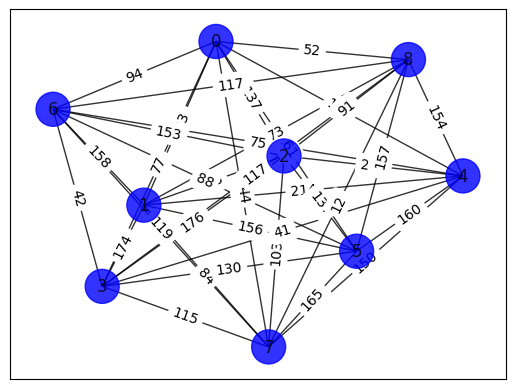

In [12]:
# lets try with merging the nearest nodes to make it smaller, we can merge Mumbai-Pune and Ahemdabad as MPA, Chennai-Bangaluru as CB and Dharamshala-Delhi as DD to reduce this problem from 9 node to a four node  problem    
cci_2023_TeamINDIA_Tsp_graph = nx.Graph()
cci_2023_TeamINDIA_Tsp_graph.add_nodes_from(np.arange(0, num_Tm_Ind_cities, 1))
print('The number of combinations of relevant edges for a', num_Tm_Ind_cities,'cities graph in this team_INDIA_tour_tsp problem is = ', len(list(combinations(range(0, num_Tm_Ind_cities),2))))

Tm_Ind_cities = [(0, 1, 123), (0, 2, 137), (0, 3, 77), (0, 4, 108), (0, 5, 161), (0, 6, 94), (0, 7, 44), (0, 8, 52), 
                (1, 2, 28),  (1, 3, 174), (1, 4, 214), (1, 5, 156), (1, 6, 158), (1, 7, 84), (1, 8, 73),
                (2, 3, 176),  (2, 4, 217), (2, 5, 137), (2, 6, 153), (2, 7, 103), (2, 8, 91), 
                (3, 4, 41),  (3, 5, 130), (3, 6, 42), (3, 7, 115), (3, 8, 117), 
                (4, 5, 160),  (4, 6, 75), (4, 7, 150), (4, 8, 154),
                (5, 6, 88), (5, 7, 165), (5, 8, 157), 
                (6, 7, 119), (6, 8, 117), 
                (7, 8, 12)]

cci_2023_TeamINDIA_Tsp_graph.add_weighted_edges_from(Tm_Ind_cities)
colors = ["b" for node in cci_2023_TeamINDIA_Tsp_graph.nodes()]
layout = nx.spring_layout(cci_2023_TeamINDIA_Tsp_graph)

graph_plot(cci_2023_TeamINDIA_Tsp_graph, colors, layout)

In [31]:
# lets try with merging the nearest nodes to make it smaller, we can merge Mumbai-Pune and Ahemdabad as MPA, Chennai-Bangaluru as CB and Dharamshala-Delhi as DD to reduce this problem from 9 node to a four node  problem    
num_Tm_Ind_cities = 9
#print("Tm_Ind_cities:", Tm_Ind_cities)
tupleArray = np.asarray(Tm_Ind_cities)

cnts = 0
drop_list = []
for edge in tupleArray :
    if(edge[2] < 42) :
        print('Node to be merged are - ', edge[0], edge[1])
        drop_list.append(edge[1])
#        edge[0] = edge[1]
        cnts = cnts + 1

print('Drop list :', drop_list)
new_tuple_Array = []
for edge in tupleArray :
    if edge[1] in drop_list or edge[0] in drop_list : 
        pass
    else :
        new_tuple_Array.append([edge[0], edge[1], edge[2]])  
                
new_tuple = tuple(map(tuple, tupleArray))

final_edge_array = [] 
nodes_merged =  num_Tm_Ind_cities - len(drop_list)
#edge_to = 0
new_tuple_cntr = 0
print('Old edge set with 9 nodes are :',  new_tuple)
print('New edge set with reduced',nodes_merged, 'nodes are :',  new_tuple_Array) 
print(nodes_merged)
for i in range(nodes_merged) :
    for j in range(i, nodes_merged - 1) :
        final_edge_array.append([i, j+1, new_tuple_Array[new_tuple_cntr][2]])
        #print (i, j+1, new_tuple_Array[new_tuple_cntr])
        new_tuple_cntr = new_tuple_cntr + 1
print('Final_edge_array - ', final_edge_array)

Node to be merged are -  1 2
Node to be merged are -  3 4
Node to be merged are -  7 8
Drop list : [2, 4, 8]
Old edge set with 9 nodes are : ((0, 1, 123), (0, 2, 137), (0, 3, 77), (0, 4, 108), (0, 5, 161), (0, 6, 94), (0, 7, 44), (0, 8, 52), (1, 2, 28), (1, 3, 174), (1, 4, 214), (1, 5, 156), (1, 6, 158), (1, 7, 84), (1, 8, 73), (2, 3, 176), (2, 4, 217), (2, 5, 137), (2, 6, 153), (2, 7, 103), (2, 8, 91), (3, 4, 41), (3, 5, 130), (3, 6, 42), (3, 7, 115), (3, 8, 117), (4, 5, 160), (4, 6, 75), (4, 7, 150), (4, 8, 154), (5, 6, 88), (5, 7, 165), (5, 8, 157), (6, 7, 119), (6, 8, 117), (7, 8, 12))
New edge set with reduced 6 nodes are : [[0, 1, 123], [0, 3, 77], [0, 5, 161], [0, 6, 94], [0, 7, 44], [1, 3, 174], [1, 5, 156], [1, 6, 158], [1, 7, 84], [3, 5, 130], [3, 6, 42], [3, 7, 115], [5, 6, 88], [5, 7, 165], [6, 7, 119]]
6
Final_edge_array -  [[0, 1, 123], [0, 2, 77], [0, 3, 161], [0, 4, 94], [0, 5, 44], [1, 2, 174], [1, 3, 156], [1, 4, 158], [1, 5, 84], [2, 3, 130], [2, 4, 42], [2, 5, 115],

The cities that have merged are "Banguluru and Chennai (1 & 2)" so we replace both nodes with one of only Bangaluru  1, similarly two nodes for  "Delhi and Dharamshala (3 & 4)" are replaced with the 3 (that in turn actually takes the index  2 as 1 and 2 have merged earlier), the third set of merging nodes are "Mumbai and Pune (7 & 8)" replaced with mumbai only and that will take an index of 5 as two other sets of nodes have been already merged earlier. 

So our new set of nodes are Ahemdabad, Bangalore, Delhi, Kolkata, Lucknow and Mumbai, those are marked as nodes 0, 1, 2, 3, 4, 5 respectively. 

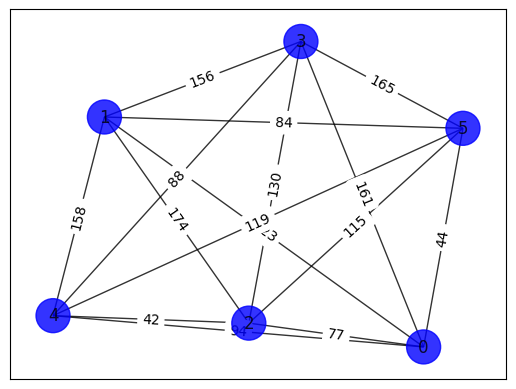

In [15]:
# lets try to solve this problem using qiskit vqe
cci_2023_TeamINDIA_Tsp_graph = nx.Graph()
cci_2023_TeamINDIA_Tsp_graph.add_nodes_from(np.arange(0, nodes_merged, 1))
Tm_Ind_cities_merged = tuple(map(tuple, final_edge_array)) 
cci_2023_TeamINDIA_Tsp_graph.add_weighted_edges_from(Tm_Ind_cities_merged)
colors = ["b" for node in cci_2023_TeamINDIA_Tsp_graph.nodes()]
layout = nx.spring_layout(cci_2023_TeamINDIA_Tsp_graph)

graph_plot(cci_2023_TeamINDIA_Tsp_graph, colors, layout)

In [14]:
# lets build the adjecency matrix to get a better view of weigths (distances) between the nodes.   
ent_temp = 0
adjacency_matrix = np.zeros([nodes_merged, nodes_merged])
for i in range(nodes_merged):
    for j in range(nodes_merged):
        ent_temp = cci_2023_TeamINDIA_Tsp_graph.get_edge_data(i, j, default=0)
        if ent_temp != 0:
            adjacency_matrix[i, j] = ent_temp["weight"]
print(" adjacency matrix for our symmetric tsp problem is given by \n", adjacency_matrix)

 adjacency matrix for our symmetric tsp problem is given by 
 [[  0. 123. 137.  77. 108. 161.]
 [123.   0.  28. 174. 214. 156.]
 [137.  28.   0. 176. 217. 137.]
 [ 77. 174. 176.   0.  41. 130.]
 [108. 214. 217.  41.   0. 160.]
 [161. 156. 137. 130. 160.   0.]]


In [15]:
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_optimization.applications import Tsp
from qiskit_optimization.problems import QuadraticProgram


tsp_prob_instance = Tsp(adjacency_matrix)
tsp_qbo = tsp_prob_instance.to_quadratic_program()
inst_qubo = QuadraticProgramToQubo()   
tsp_qubo = inst_qubo.convert(tsp_qbo)    # convert the problem QBO function to QUBO 
#print(tsp_qubo.prettyprint())
tsp_qubitOp, offset = tsp_qubo.to_ising()      #convert qubo to ising
print("***** Ising Hamiltonian Associted with our TSP probem ***** \n")
#print(tsp_qubitOp)

***** Ising Hamiltonian Associted with our TSP probem ***** 



In [ ]:
### THIS CELL WILL TAKE LONG TIME OR MAY NOT RUN AS NUMBER OF NODES ARE NINE and dimensions of this problem is 512 (A 512 X 512 Matrix) hence it may not get resolved with classical eigensolver 
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

ev_solver = NumPyMinimumEigensolver()
tsp_numpy_result = ev_solver.compute_minimum_eigenvalue(tsp_qubitOp)

energy_numpy = tsp_numpy_result.eigenvalue.real

In [16]:
# lets prepare an Ansatz for our reduced 6 node problem 
n=6
tsp_pqc_const_6 = tsp_node_constrained_circ(n)
#tsp_pqc_const_6.draw()


In [29]:
## we will be using the row constraint Ansatz that set variables assoiated with each node to a W-state with help of parameterized quantum gates, this will restrict the values of a node's variables restricted to only take values permitted by
# W state setup. The problem here is that variables associated with multiple nodes may end up taking same values, which represent an invalid solution with many nodes positioned at same order in cycle. however we will see valid solutions 
# for lower energies and than we can also 

from qiskit.algorithms.optimizers import NFT, SPSA
from qiskit_aer.primitives import Estimator, Sampler

n=6
np.random.seed(10)
init_state = np.random.rand((n-1)*n) * 2 * np.pi  # set parameters to some initial value
print(init_state)
optimizer = NFT(maxiter=50)  # use NFT

# if you would like to use  IBM service  set #backend = service.backends(simulator=True)[0]
estimator = Estimator()  # use local sampler and Estimator to spped up execution

#with Session(service = service, backend = backend):
result_tsp_6, mean_tsp_6 = Get_min_vqe_energy(estimator, tsp_pqc_const_6, optimizer, tsp_qubitOp, init_state)

[4.84635053 0.13038834 3.98132928 4.70487355 3.13221194 1.41243898
 1.24446568 4.7785554  1.06255472 0.55505542 4.30624274 5.99034706
 0.02480769 3.2181989  5.10584809 3.84861478 4.53492241 1.83391142
 5.76654488 4.48981206 3.4089068  0.89328075 2.34576918 4.23570643
 2.77611971 2.72699035 3.8815444  3.22414267 4.08656602 3.77643912]


In [28]:
print(' result_tsp_6 with NFT - evals : ', result_tsp_6.cost_function_evals, ' optimal energy value : ', result_tsp_6.optimal_value,  'NFT Optimizer time : ', result_tsp_6.optimizer_time)

 result_tsp_6 with NFT - evals :  650  optimal energy value :  -1619713.8115234375 NFT Optimizer time :  173.02746486663818


In [18]:
circ_optimal = result_tsp_6.optimal_circuit.measure_all(inplace=False) 

sampler = Sampler()
energy, sampler_result, result_prob_dist, result_bitstring = run_optimal_circuit(result=result_tsp_6_NFT, optimal_circuit=circ_optimal)
print("Optimal bitstring = ", result_bitstring)

Optimal bitstring =  [1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1]


We note that with NFT we are able to converge close to ground state energy and find the statevector associated with same, the bitstring we get for minimum energy solution is (1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1) that translates to a tour of cities in this order (0, 2, 4, 3, 1, 5) -> (Ahemdabad, Delhi, Lucknow, Kolkata, Bangulure, Mumbai) that while taking the return to Ahemdabad to consider full cycle turn out as 775 + 420 + 886 + 1560 + 842 + 441 = 4924 Kms.


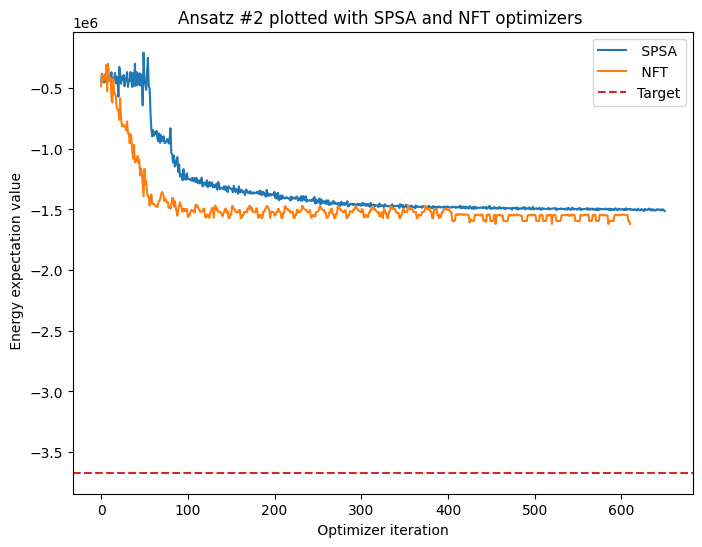

In [34]:
# Plotted as tried with both SPSA and NFT optimizer, couldn't find the minimum eigen energy for nine node graph with numpy minimumeigensolver hence taken imaginary value of -3600000
ideal_6 = -3600000.0
convergence_plot("Ansatz #2 plotted with SPSA and NFT optimizers ", Numpy_exp = ideal_6, Quantum_exp = [mean_tsp_6, mean_tsp_6_NFT])

To solve nine cities problem, we earlier merged three nearby set of cities to reduce the problem size from nine to six, Since We have now found the best route for six cities using vqe as (Ahemdabad, Delhi, Lucknow, Kolkata, Bangulure, Mumbai)

we can now work on finding the minimum distance tour for all nine cities for same we will use the drop list to insert one city at a time, for each such city we will insert that before and after the merged and retained node and then compare two routes to find minimum route total -

    for example if we insert the merged and removednode for Pune in the route before Mumbai then we get this tour route  (Ahemdabad, Delhi, Lucknow, Kolkata, Bangulure, Pune, Mumbai), similarly we can insert Pune after Mumbai that will     give another possible route as  (Ahemdabad, Delhi, Lucknow, Kolkata, Bangulure, Mumbai, Pune) then with help of a classical routine we can chose the path with smaller distance as solution. 
    
Then when select another city from the drop list and apply same logic to all such nodes to find the optimal tour, here in our case it comes as 
    (Ahemdabad, Dharamshala, Delhi, Lucknow, Kolkata, chennai, Bangulure, Pune, Mumbai) which is indeed equal to the initial indexing of cities (0, 4, 3, 6, 5, 2, 1, 8, 7) that we obtained as optimal route from our exhaustive
    bruteforce search earlier in this notebook.   

In [ ]:
####end of program 